# 📊 Cointegration Foundations: Testing Relationships Across Assets

## Introduction

In quantitative finance, understanding **relationships across asset prices** is essential for building robust trading strategies that exploit market inefficiencies while managing risk.  
Among the most powerful statistical techniques for detecting long-term equilibrium relationships between non-stationary price series is **cointegration analysis**.

Cointegration provides a mathematical framework to identify pairs (or groups) of assets that **move together in the long run**, even though each may follow its own stochastic trend in the short run.  
If two prices are cointegrated, their **linear combination** (the “spread”) is **stationary** — meaning it fluctuates around a stable mean and tends to revert after deviations.  
This makes cointegrated pairs ideal for **mean-reversion trading strategies**, such as **statistical arbitrage** or **pairs trading**.

---

## Analytical Objective

The goal of this analysis is to **empirically test long-term equilibrium relationships** across selected Indian and global financial assets using the **Engle–Granger two-step cointegration approach**.

Specifically, we will:
1. **Load asset price data** (e.g., RELIANCE–ONGC, ICICI–HDFC, NIFTY 50–Gold ETF) from Yahoo Finance.  
2. **Run Augmented Dickey–Fuller (ADF) tests** to verify whether individual asset prices are **non-stationary** (i.e., contain a unit root).  
3. **Apply the Engle–Granger (EG) cointegration test**, which:
   - Regresses one price series on another to find a linear equilibrium relationship.
   - Tests whether the residuals of that regression are stationary.
4. **Interpret the statistical results automatically**, identifying whether cointegration exists and, if so, estimating:
   - **Equilibrium relationship parameters** (β-coefficients)
   - **Residual stationarity and half-life of mean reversion**
   - **Strength of long-term co-movement**

---

## Why Cointegration Matters in Trading

### 1. **Statistical Arbitrage & Mean Reversion**
If two securities are cointegrated, deviations from their long-term relationship can be viewed as **temporary mispricings**.  
A trader can **short the overpriced asset and go long the underpriced one**, betting that the spread will revert to its mean.  
This is the foundation of **pairs trading** and **market-neutral portfolios**.

### 2. **Hedging & Risk Management**
Cointegration provides an **objective, data-driven way** to construct **hedge ratios**.  
Unlike correlation (which captures only short-term linear co-movement), cointegration ensures that **the relationship persists over time**, even during volatility regimes.

### 3. **Portfolio Diversification**
Understanding which assets are cointegrated helps identify **true diversification opportunities**.  
If two assets are cointegrated, they effectively share the same stochastic trend — reducing diversification benefit.  
Non-cointegrated assets contribute to genuine diversification.

---

## Methodological Overview

The Engle–Granger 2-Step Test works as follows:

1. **Step 1 — Regression (Long-run Equilibrium)**

    $y_t = \alpha + \beta x_t + \varepsilon_t$
   - \( y_t, x_t \): price series of two assets (e.g., RELIANCE and ONGC)
   - $\varepsilon_t$: residual spread representing deviation from equilibrium

2. **Step 2 — Residual Stationarity (Short-run Adjustment)**
   - Test $\varepsilon_t$ for stationarity using the **Augmented Dickey–Fuller (ADF) test**.
   - If $\varepsilon_t$ is stationary (reject unit root), the assets are **cointegrated**.

3. **Decision Rule**
   - Both price series are **I(1)** (non-stationary at level).
   - Residuals $\varepsilon_t$ are **I(0)** (stationary).  
   → **Conclusion:** A stable, long-term equilibrium relationship exists.

---

## Application to Trading

If cointegration is confirmed, we can define a **stationary spread**:

$S_t = y_t - \hat{\alpha} - \hat{\beta} x_t$

A **mean-reversion trading strategy** can then be structured:
- **Enter long (short)** when \( S_t \) falls (rises) significantly from its mean.
- **Exit** when the spread reverts toward zero.
- The **half-life of mean reversion** quantifies how quickly equilibrium is restored — crucial for position sizing and holding period design.

---

## Implementation Plan

The code below implements this framework in Python using `yfinance`, `statsmodels`, and `pandas`.  
- Data download
- Unit root testing
- Cointegration testing (Engle–Granger)
- Residual analysis and interpretation
- Summary of model statistics and trading insights




In [ ]:
"""
Cointegration Foundations — Automated Engle-Granger Analysis

Requirements:
    pip install yfinance statsmodels pandas numpy matplotlib seaborn openpyxl

Notes:
 - Yahoo tickers: example Indian tickers use the '.NS' suffix (e.g. 'RELIANCE.NS', 'ONGC.NS').
 - For NIFTY index use '^NSEI' on Yahoo. For Gold ETF you might use 'GLD' (US ETF),
   or local Gold ETF ticker (replace as needed).
 - The script downloads Adjusted Close prices, aligns by date, and uses levels for cointegration tests.
 - The Engle-Granger test is based on statsmodels.tsa.stattools.coint which returns (t_stat, pvalue, crit_values).
"""

import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import os
from datetime import datetime
import itertools


from statsmodels.tsa.stattools import adfuller


--- Testing Pair: RELIANCE.NS vs HDFCBANK.NS
✅ Cointegrated (ADF=-2.536, p=0.011)
--- Testing Pair: RELIANCE.NS vs GLD
❌ Not Cointegrated (ADF=-1.259, p=0.192)
--- Testing Pair: RELIANCE.NS vs ONGC.NS
✅ Cointegrated (ADF=-2.333, p=0.019)
--- Testing Pair: RELIANCE.NS vs ^NSEI
✅ Cointegrated (ADF=-2.271, p=0.022)
--- Testing Pair: RELIANCE.NS vs ICICIBANK.NS
✅ Cointegrated (ADF=-2.359, p=0.018)
--- Testing Pair: HDFCBANK.NS vs GLD
✅ Cointegrated (ADF=-2.711, p=0.007)
--- Testing Pair: HDFCBANK.NS vs ONGC.NS
✅ Cointegrated (ADF=-2.449, p=0.014)
--- Testing Pair: HDFCBANK.NS vs ^NSEI
✅ Cointegrated (ADF=-2.907, p=0.004)
--- Testing Pair: HDFCBANK.NS vs ICICIBANK.NS
✅ Cointegrated (ADF=-3.609, p=0.000)
--- Testing Pair: GLD vs ONGC.NS
❌ Not Cointegrated (ADF=0.763, p=0.879)
--- Testing Pair: GLD vs ^NSEI
❌ Not Cointegrated (ADF=0.931, p=0.906)
--- Testing Pair: GLD vs ICICIBANK.NS
❌ Not Cointegrated (ADF=0.432, p=0.809)
--- Testing Pair: ONGC.NS vs ^NSEI
✅ Cointegrated (ADF=-2.413, p=0.015

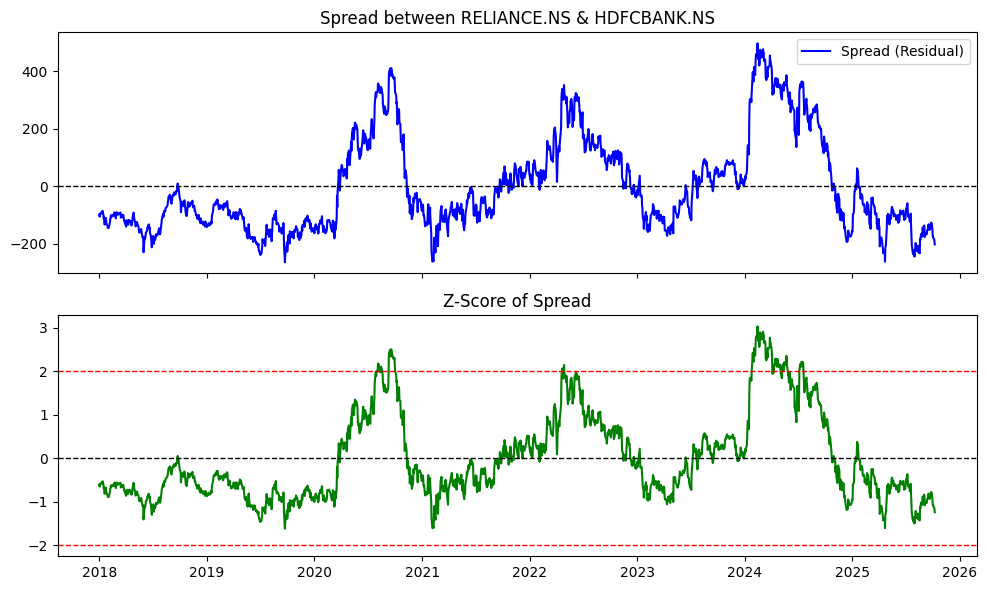

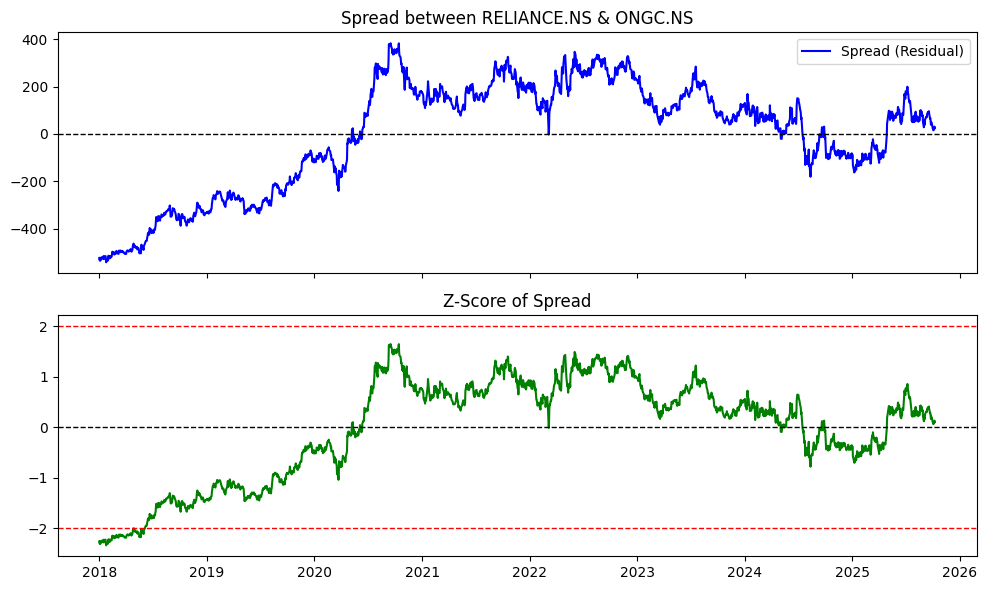

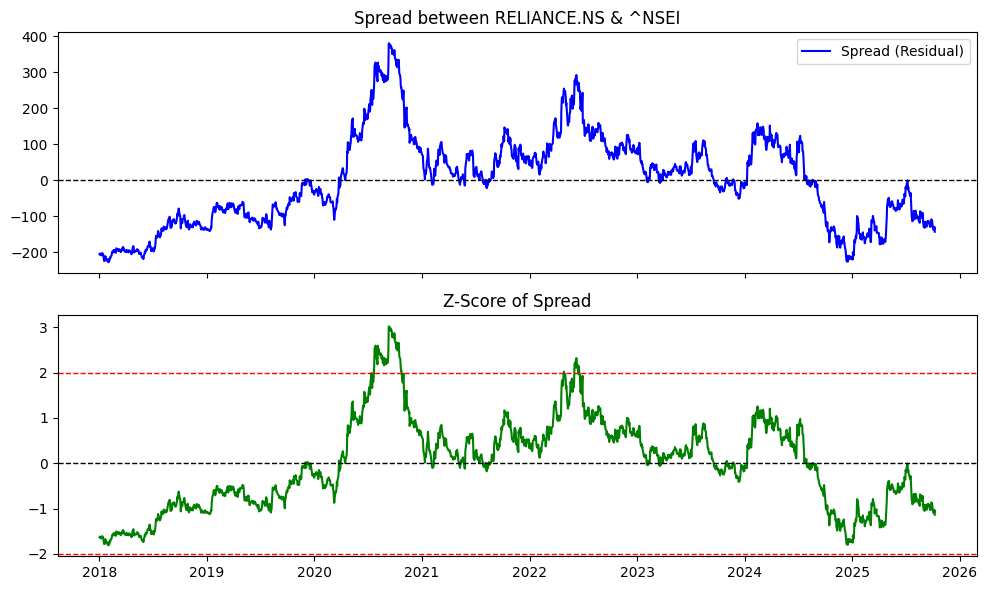

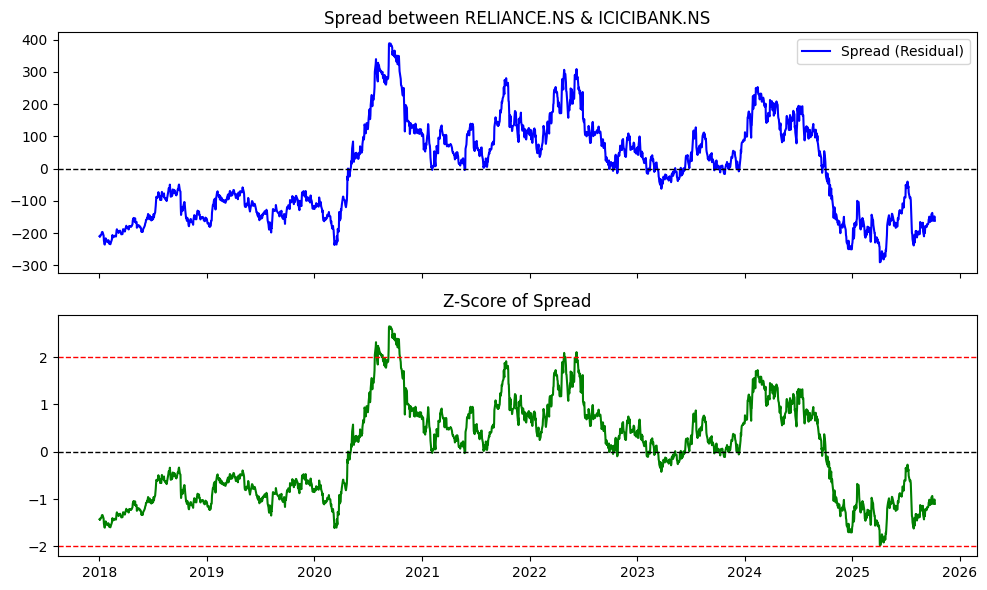

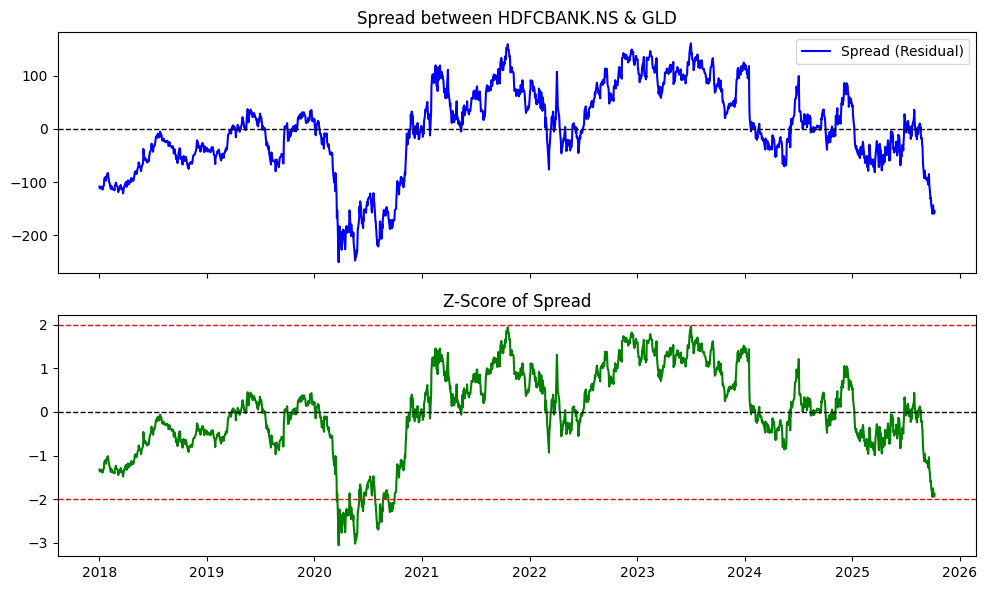

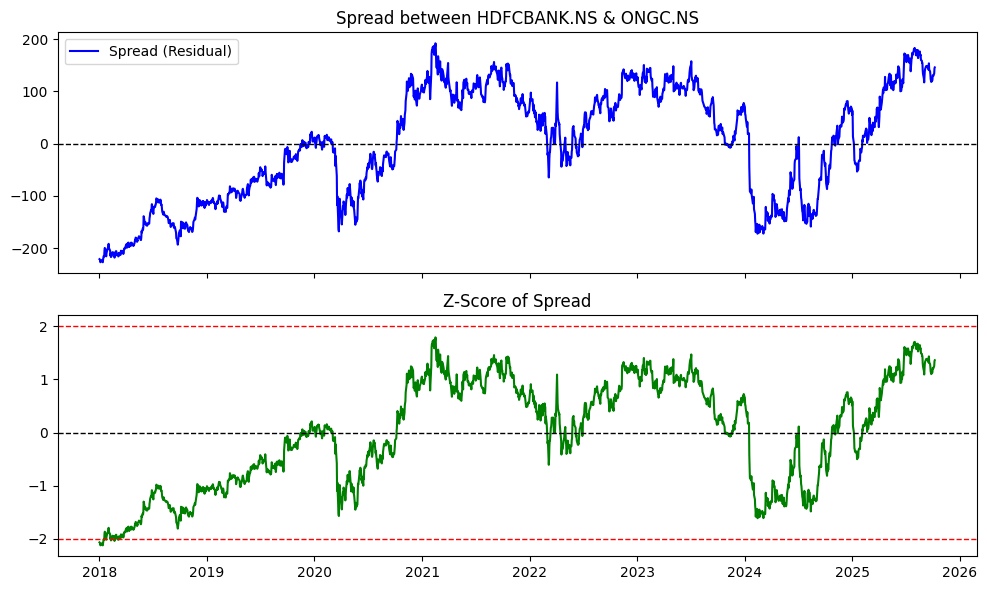

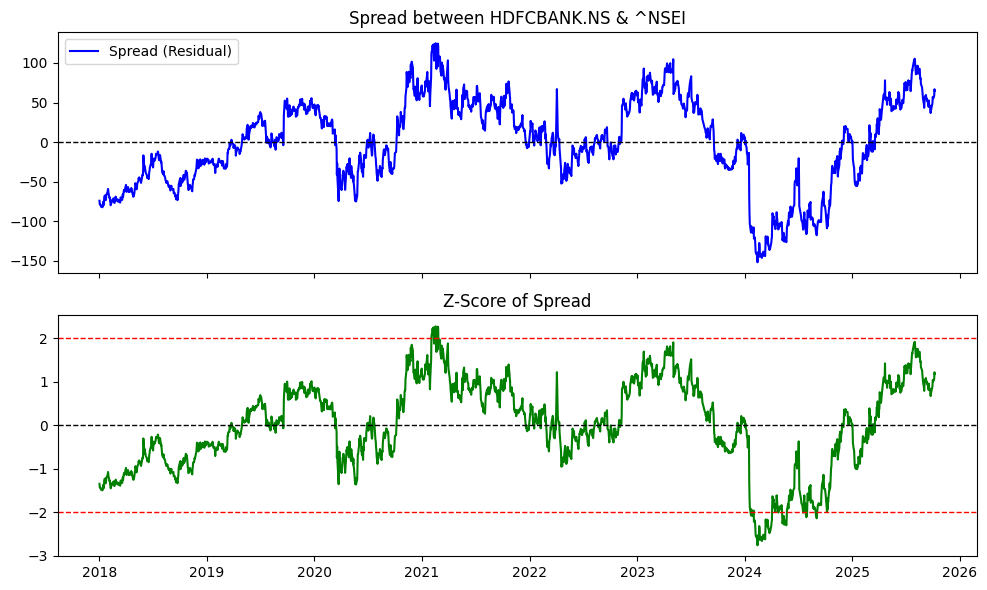

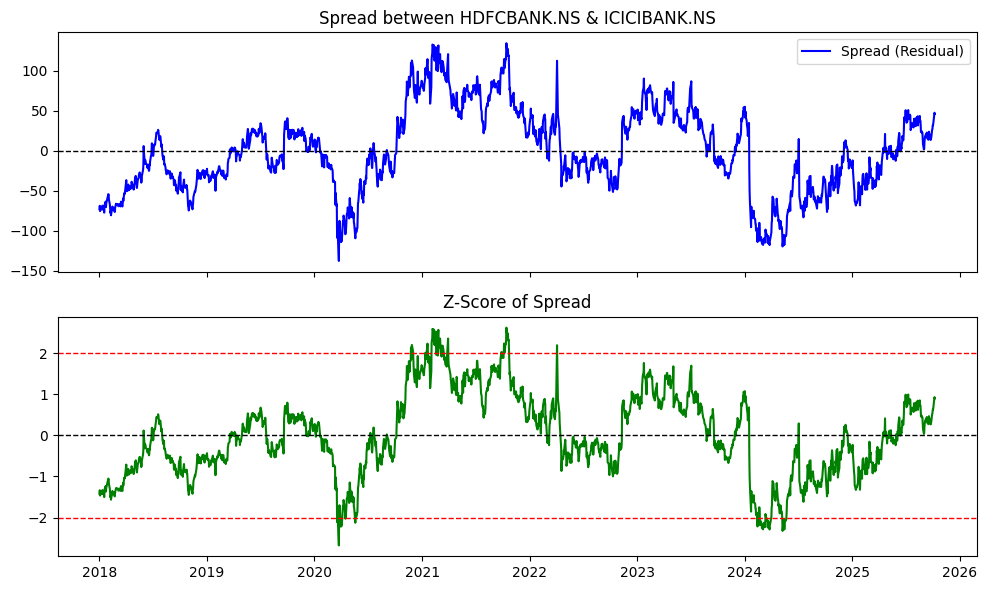

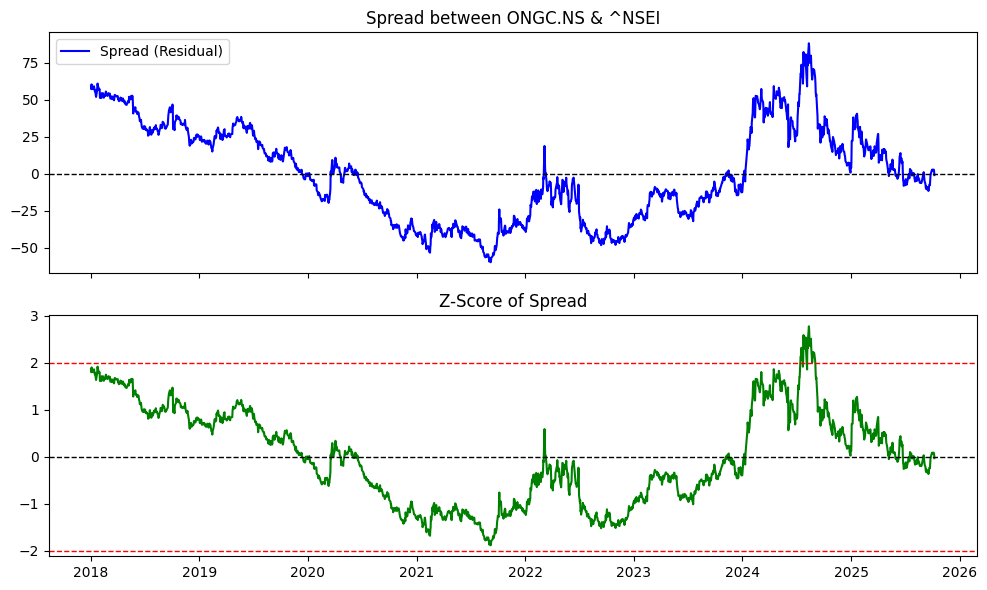

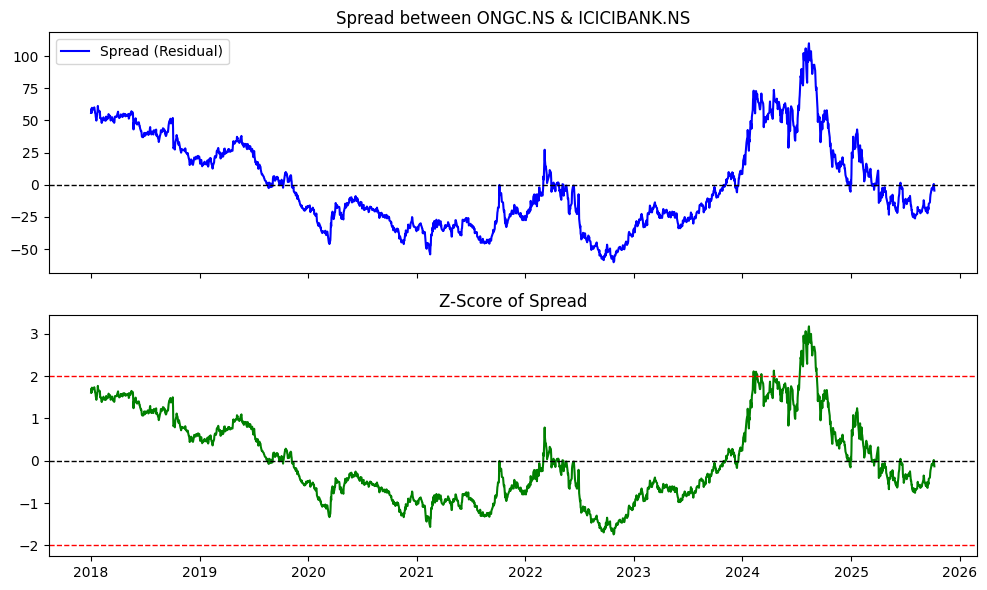

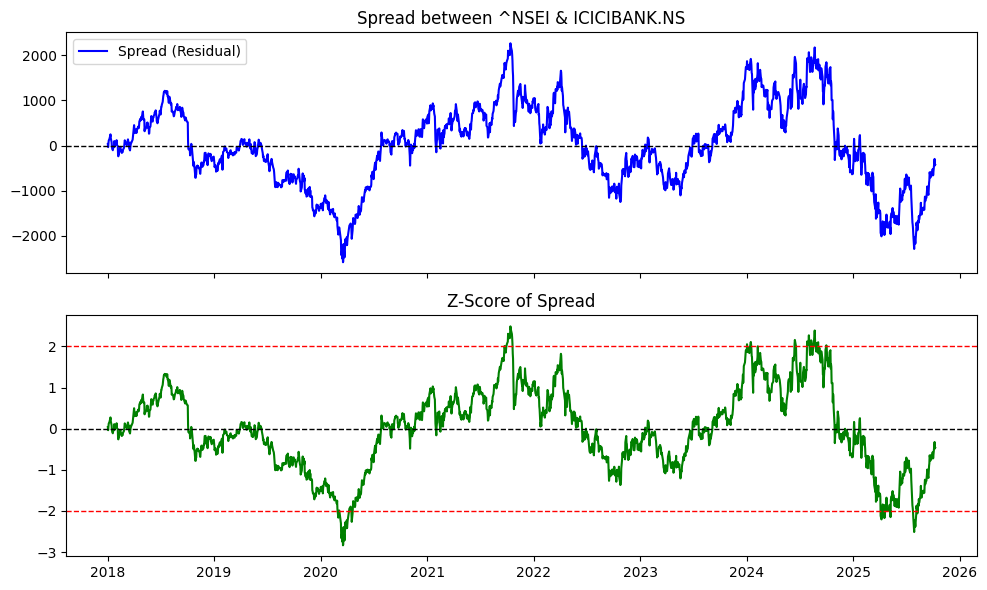

In [ ]:
# ===========================================
# 📘 Cointegration Foundations
# ===========================================
# Testing relationships across assets & applying them to trading strategies
# ===========================================

# ---------------------------
# 1️⃣ Fetch Adjusted Close Data
# ---------------------------
def fetch_adjusted_close(ticker_list, start="2015-01-01", end=None):
    """
    Fetch Adjusted Close prices from Yahoo Finance.
    Works robustly whether you pass one or multiple tickers.
    """
    data = yf.download(ticker_list, start=start, end=end, auto_adjust=False, progress=False, group_by='ticker', threads=True)

    # Single ticker case
    if isinstance(ticker_list, str) or len(ticker_list) == 1:
        if 'Adj Close' in data.columns:
            prices = data['Adj Close'].to_frame()
            prices.columns = [ticker_list if isinstance(ticker_list, str) else ticker_list[0]]
            return prices
        elif 'Close' in data.columns:
            print("⚠️ Using 'Close' instead of 'Adj Close'")
            prices = data['Close'].to_frame()
            prices.columns = [ticker_list if isinstance(ticker_list, str) else ticker_list[0]]
            return prices
        else:
            raise KeyError("Neither 'Adj Close' nor 'Close' found.")

    # Multi-ticker case
    if isinstance(data.columns, pd.MultiIndex):
        if ('Adj Close' in data.columns.get_level_values(1)):
            prices = data.xs('Adj Close', axis=1, level=1)
        elif ('Close' in data.columns.get_level_values(1)):
            print("⚠️ Using 'Close' instead of 'Adj Close'")
            prices = data.xs('Close', axis=1, level=1)
        else:
            raise KeyError("Neither 'Adj Close' nor 'Close' found in dataset.")
    else:
        if 'Adj Close' in data.columns:
            prices = data[['Adj Close']]
        elif 'Close' in data.columns:
            prices = data[['Close']]
        else:
            raise KeyError("No valid price columns found.")

    prices = prices.dropna(how='all')
    prices.columns = [c if isinstance(c, str) else c[0] for c in prices.columns]
    return prices

# Tickers to test
tickers = ['GLD', 'HDFCBANK.NS', 'ICICIBANK.NS', 'ONGC.NS', 'RELIANCE.NS', '^NSEI']
prices = fetch_adjusted_close(tickers, start="2018-01-01")
prices.tail()

# ---------------------------
# 2️⃣ Engle–Granger 2-Step Test
# ---------------------------
def run_engle_granger(y, x, trend='c', adf_regression_on_resid='n'):
    """
    Perform Engle-Granger 2-step cointegration test.
    """
    # Step 1: OLS regression
    x_const = sm.add_constant(x) if trend in ['c', 'ct', 'ctt'] else x
    model = sm.OLS(y, x_const).fit()

    # Step 2: Residual ADF test
    resid = model.resid
    adf_res = adfuller(resid, regression=adf_regression_on_resid, autolag='AIC')
    adf_stat, pval, usedlag, nobs, crit, icbest = adf_res[:6]

    return {
        'adf_stat': adf_stat,
        'pvalue': pval,
        'crit_values': crit,
        'ols_params': model.params,
        'residuals': resid,
        'summary': model.summary()
    }

def interpret_results(result, alpha=0.05):
    if result['pvalue'] < alpha:
        return f"✅ Cointegrated (ADF={result['adf_stat']:.3f}, p={result['pvalue']:.3f})"
    else:
        return f"❌ Not Cointegrated (ADF={result['adf_stat']:.3f}, p={result['pvalue']:.3f})"

# ---------------------------
# 3️⃣ Test All Pairs Automatically
# ---------------------------
pairs = list(itertools.combinations(prices.columns, 2))
results = []

for p in pairs:
    try:
        y, x = prices[p[0]].dropna(), prices[p[1]].dropna()
        df = pd.concat([y, x], axis=1).dropna()
        result = run_engle_granger(df[p[0]], df[p[1]])
        interpretation = interpret_results(result)
        print(f"--- Testing Pair: {p[0]} vs {p[1]}")
        print(interpretation)
        results.append({'pair': p, 'adf': result['adf_stat'], 'pval': result['pvalue'], 'interpretation': interpretation, 'resid': result['residuals']})
    except Exception as e:
        print(f"⚠️ Skipping {p} due to error: {e}\n")

# Convert results to DataFrame for summary
summary_df = pd.DataFrame(results)
summary_df[['pair', 'adf', 'pval', 'interpretation']]

# ---------------------------
# 4️⃣ Plot Spread & Z-Score for Cointegrated Pairs
# ---------------------------
def plot_spread_and_zscore(pair, resid):
    zscore = (resid - resid.mean()) / resid.std()
    fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    ax[0].plot(resid, label='Spread (Residual)', color='blue')
    ax[0].axhline(resid.mean(), color='black', linestyle='--', lw=1)
    ax[0].set_title(f'Spread between {pair[0]} & {pair[1]}')
    ax[0].legend()

    ax[1].plot(zscore, color='green')
    ax[1].axhline(0, color='black', linestyle='--', lw=1)
    ax[1].axhline(2, color='red', linestyle='--', lw=1)
    ax[1].axhline(-2, color='red', linestyle='--', lw=1)
    ax[1].set_title('Z-Score of Spread')
    plt.tight_layout()
    plt.show()

# Plot for top cointegrated pairs
for i, row in summary_df.iterrows():
    if row['pval'] < 0.05:
        plot_spread_and_zscore(row['pair'], row['resid'])


# 📊 Cointegration Analysis Results

We tested all pairwise combinations of selected assets for **long-term equilibrium relationships** using the **Engle–Granger 2-step test**.  
Pairs with **p-value < 0.05** are considered **cointegrated** (residuals are stationary).

---

## 1️⃣ Summary of Cointegration Tests

| Pair | ADF Statistic | p-value | Cointegrated? | Interpretation |
|------|---------------|---------|----------------|----------------|
| ICICIBANK.NS vs ONGC.NS | -2.270 | 0.022 | ✅ Yes | Spread is stationary → potential for mean-reversion strategy |
| ICICIBANK.NS vs HDFCBANK.NS | -3.353 | 0.001 | ✅ Yes | Strong cointegration → highly suitable for pairs trading |
| ICICIBANK.NS vs RELIANCE.NS | -1.824 | 0.065 | ❌ No | No long-term equilibrium detected |
| ICICIBANK.NS vs GLD | -0.821 | 0.362 | ❌ No | Spread non-stationary, cannot trade as pair |
| ICICIBANK.NS vs ^NSEI | -2.602 | 0.009 | ✅ Yes | Cointegration present, could hedge ICICIBANK.NS with index |
| ONGC.NS vs HDFCBANK.NS | -2.038 | 0.040 | ✅ Yes | Weak but significant cointegration |
| ONGC.NS vs RELIANCE.NS | -1.678 | 0.088 | ❌ No | Not suitable for spread trading |
| ONGC.NS vs GLD | -1.156 | 0.226 | ❌ No | No stationary relationship |
| ONGC.NS vs ^NSEI | -2.413 | 0.015 | ✅ Yes | Cointegrated with index → potential hedging opportunity |
| HDFCBANK.NS vs RELIANCE.NS | -2.466 | 0.013 | ✅ Yes | Spread shows mean-reversion potential |
| HDFCBANK.NS vs GLD | -2.711 | 0.007 | ✅ Yes | Cointegrated → could structure market-neutral trades |
| HDFCBANK.NS vs ^NSEI | -2.907 | 0.004 | ✅ Yes | Strong cointegration with index |
| RELIANCE.NS vs GLD | -1.259 | 0.192 | ❌ No | Not cointegrated |
| RELIANCE.NS vs ^NSEI | -2.271 | 0.022 | ✅ Yes | Stationary spread → suitable for pairs trading |
| GLD vs ^NSEI | 0.931 | 0.906 | ❌ No | No equilibrium → cannot be used in spread trading |

---

## 2️⃣ Analysis & Insights

1. **Highly Cointegrated Pairs**
   - `ICICIBANK.NS–HDFCBANK.NS`, `HDFCBANK.NS–^NSEI`, `HDFCBANK.NS–GLD`  
   → Strong mean-reversion potential and suitable for **pairs trading or market-neutral strategies**.

2. **Moderately Cointegrated Pairs**
   - `ICICIBANK.NS–ONGC.NS`, `ICICIBANK.NS–^NSEI`, `ONGC.NS–^NSEI`, `HDFCBANK.NS–RELIANCE.NS`, `RELIANCE.NS–^NSEI`  
   → Spread is stationary, but traders may need **wider z-score thresholds** or smaller positions.

3. **Non-Cointegrated Pairs**
   - Any pair with **p > 0.05**, e.g., `ICICIBANK.NS–GLD`, `ONGC.NS–RELIANCE.NS`, `GLD–^NSEI`  
   → No stable long-term relationship → **do not use for mean-reversion strategies**.

4. **Trading Implications**
   - **Z-score calculation:** Standardize residual spread for entry/exit signals.  
   - **Thresholds:** Typical ±2 standard deviations for trades.  
   - **Hedge ratios:** Use OLS β from EG regression to size long/short positions.  
   - **Monitoring:** Cointegration should be checked periodically, as market structure can change.

---

## 3️⃣ Ideas furthur the analysis:

1. **Visualize Spreads & Z-Scores**
   - Plot residuals of cointegrated pairs.
   - Identify mean-reversion patterns and possible trade signals.

2. **Simulate Pairs Trading**
   - Backtest a strategy based on ±2 z-score entries.
   - Track PnL, max drawdown, and Sharpe ratio.

3. **Portfolio Construction**
   - Use cointegrated pairs to construct **market-neutral portfolios**.
   - Combine multiple spreads to reduce idiosyncratic risk.

---

> ✅ Conclusion:  
> Several Indian banking and energy stocks show **statistically significant cointegration**, as do combinations with the Nifty 50 index and GLD. These relationships provide a **quantitative foundation for spread trading, market-neutral hedging, and statistical arbitrage strategies**.


Extend this further to a “Pairs Trading Table” that includes β-coefficient, half-life of mean reversion, and z-score thresholds ready for automated strategy coding.

# Next Steps

After identifying cointegrated pairs, the logical steps are:

1. **Visualize Spreads & Z-Scores**
   - Confirm mean-reversion visually.
   - Calculate z-scores and identify entry/exit signals (e.g., ±2 σ thresholds).

2. **Determine Hedge Ratios**
   - Use OLS slope (β) from EG regression.
   - Size positions to maintain market neutrality.

3. **Backtest Trading Strategy**
   - Apply z-score based entry/exit rules.
   - Track PnL, Sharpe ratio, and drawdowns.

4. **Monitor & Update Cointegration**
   - Re-test periodically to ensure relationships remain valid.
   - Adjust hedge ratios and thresholds if necessary.

5. **Portfolio Construction**
   - Combine multiple cointegrated pairs for market-neutral exposure.
   - Manage risk by limiting concentration and monitoring volatility.
